In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('indian_food.csv')

In [3]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


### Exploratory Data Analysis

In [10]:
df.shape

(255, 9)

In [11]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [12]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
name              255 non-null object
ingredients       255 non-null object
diet              255 non-null object
prep_time         255 non-null int64
cook_time         255 non-null int64
flavor_profile    255 non-null object
course            255 non-null object
state             255 non-null object
region            254 non-null object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [14]:
#name column
#removing space int hte begnning or end of name if any
df['name']=df['name'].str.strip()

In [15]:
df['name']

0          Balu shahi
1              Boondi
2      Gajar ka halwa
3              Ghevar
4         Gulab jamun
            ...      
250         Til Pitha
251           Bebinca
252            Shufta
253         Mawa Bati
254            Pinaca
Name: name, Length: 255, dtype: object

In [16]:
#convert all the letter to lower case
df['name']=df['name'].str.lower()

In [17]:
#let see the number of veg and non-veg items
df['diet'].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [18]:
#lets look at the flavour profile
df['flavor_profile'].value_counts()
#there are some nan value indicated by -1

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [19]:
#lets look at course column
df['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [20]:
#lets look at unique state in the data
df['state'].unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [21]:
len(df['state'].unique())
#25 states are present in our data

25

In [22]:
#let see the region
df['region'].unique()
#here alse we can see that there are some nan value indicated as -1

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

#### observation
so here we have 255 dishes and 9 columns associated with each of them which describe as follow

- name: name of the dish
- ingredients: ingredients which are used to make particular dish
- diet: It indicates that whether the dish is veg or non- veg
- prep_time: prepartion time
- cook_time: cooking time
- flavor_profile: flavor profile include that whether the dish is spicy or sweet etc
- course: course is a course of meal, the course might be main course, snack or dessert etc
- state: state where the dish is famous or born
- region: region where the state belongs

In [23]:
#checking nan value
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [24]:
#here is NaN value in region column
df[df['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [25]:
#let see in which region uttar pradesh located according to given data
df[df['state']=="Uttar Pradesh"].head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,navrattan korma,"Green beans, potatoes, khus khus, low fat, gar...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [26]:
#so by seeing the above data we can say that Uttar Pradesh located in North region so replace NaN value of region with North
df['region'].fillna("North",inplace=True)

### Lets Plot some graph

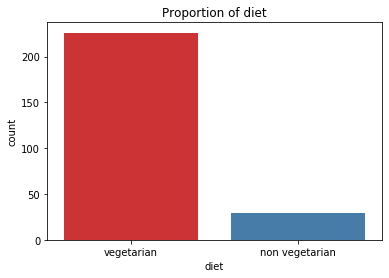

In [27]:
#Diet
sns.countplot(x='diet',data=df,palette='Set1')
plt.title("Proportion of diet")
plt.show()

#### Insights:The vegetarian diet are more than non-vegetarian

In [28]:
#Flavour
df['flavor_profile'].value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [29]:
#since there is a -1 flavour which is of no means so replace it with other flavour
df['flavor_profile']=df['flavor_profile'].replace('-1','other')

In [30]:
df['flavor_profile'].value_counts()

spicy     133
sweet      88
other      29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

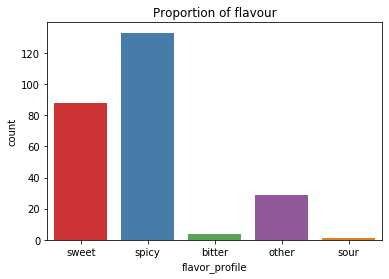

In [31]:
sns.countplot(x='flavor_profile',data=df,palette='Set1')
plt.title("Proportion of flavour")
plt.show()

#### Insights:Most of the Indian food are sweet and spicy in flavour

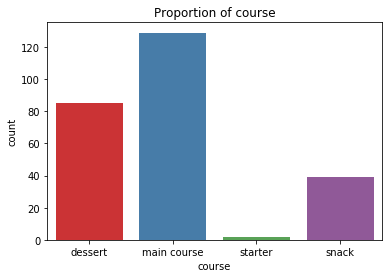

In [32]:
#course
sns.countplot(x='course',data=df,palette='Set1')
plt.title("Proportion of course")
plt.show()

#### Insights: Dishes of Main Course and Dessert are hudge

In [33]:
#states
df['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Nagaland            1
Tripura             1
Uttarakhand         1
Chhattisgarh        1
NCT of Delhi        1
Haryana             1
Name: state, dtype: int64

In [34]:
#In states also there is -1 value which is of no means and we can replace it with "All State" because there are some dishes with are common in many states
df['state']=df['state'].replace('-1','All State')

In [35]:
df['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
All State          24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Nagaland            1
Tripura             1
Uttarakhand         1
Chhattisgarh        1
NCT of Delhi        1
Haryana             1
Name: state, dtype: int64

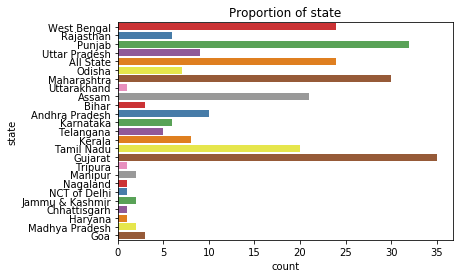

In [36]:
sns.countplot(y='state',data=df,palette='Set1')
plt.title("Proportion of state")
plt.show()

#### Insights:Among all the state Gujarat has the maximum cuisine

In [37]:
#Region
df['region'].value_counts()

West          74
South         59
North         50
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [38]:
#here also -1 value of state is present which is of no means so we replace it with 'All Region' may that cuisine if famous in all region
df['region']=df['region'].replace('-1','All Region')

In [39]:
df['region'].value_counts()

West          74
South         59
North         50
East          31
North East    25
All Region    13
Central        3
Name: region, dtype: int64

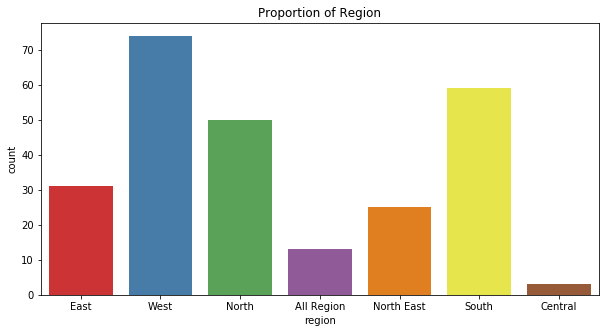

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='region',data=df,palette='Set1')
plt.title("Proportion of Region")
plt.show()

#### Insights:West region has the highest cuisine due to the gujarat state which contributes maximum number of cuisine.

In [41]:
#let analyze prep and cook time
df['prep_time'].unique()

array([ 45,  80,  15,  10,  20,   5,  30,  -1,  40,  25, 480, 180, 240,
       120,  60, 500, 150, 360, 495,  70,  35,  12])

In [42]:
#In prep time there is -1 value which is an outlier
df[df['prep_time']==-1].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East
65,pork bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


In [43]:
#let also check cook time
df['cook_time'].unique()

array([ 25,  30,  60,  40,  50,  20,   5,  45, 120,  35,  90,  75,  15,
       720,  55,  -1,  10,   2,   6])

In [44]:
#here in cook time also there is an outlier
df[df['cook_time']==-1].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,pork bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


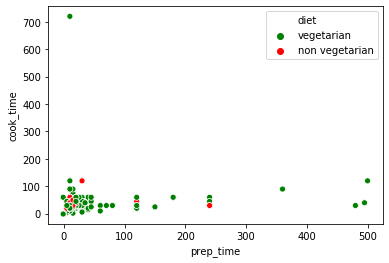

In [45]:
#let plot prep and cook time
sns.scatterplot(x='prep_time',y='cook_time',hue='diet',data=df,palette=['green','red'])
plt.show()

#### Insights: Almost all the veg and non-veg dishes take a similar amount of time

In [46]:
df.diet = df.diet.str.replace(" ", "-")

In [47]:
#Lets see ingredients column
df['ingredients']=df['ingredients'].str.lower()

In [48]:
#let split ingredients into veg and non veg ingredients
veg_ingredients=df.loc[df['diet']=='vegetarian','ingredients']
non_veg_ingredients=df.loc[df['diet']=='non-vegetarian','ingredients']

In [49]:
veg_ingredients.size + non_veg_ingredients.size

255

In [50]:
veg_ingredients.str.split(",")

0                   [maida flour,  yogurt,  oil,  sugar]
1                            [gram flour,  ghee,  sugar]
2      [carrots,  milk,  sugar,  ghee,  cashews,  rai...
3      [flour,  ghee,  kewra,  milk,  clarified butte...
4      [milk powder,  plain flour,  baking powder,  g...
                             ...                        
250          [glutinous rice,  black sesame seeds,  gur]
251    [coconut milk,  egg yolks,  clarified butter, ...
252    [cottage cheese,  dry dates,  dried rose petal...
253    [milk powder,  dry fruits,  arrowroot powder, ...
254    [brown rice,  fennel seeds,  grated coconut,  ...
Name: ingredients, Length: 226, dtype: object

In [51]:
# let's count those ingredients for getting that how many dishes are used that particular ingrediets
# let's remove unnecessary space
veg_ingredients=veg_ingredients.str.strip()
non_veg_ingredients = non_veg_ingredients.str.strip()

In [52]:
veg_cleaned_ingredients = []
non_veg_cleaned_ingredients = []


for i in veg_ingredients.str.split(","): # split by "," & iterate through all the ingredients and append it to list
    veg_cleaned_ingredients += i

for i in non_veg_ingredients.str.split(","):#split by , & iterate through all the ingredients and append it to list
    non_veg_cleaned_ingredients += i

In [53]:
# let's make a series of veg and non veg ingredients

final_veg_ingredients = pd.Series(veg_cleaned_ingredients)
final_non_veg_ingredients = pd.Series(non_veg_cleaned_ingredients)

# let's remove extra spaces
final_veg_ingredients = final_veg_ingredients.str.strip()
final_non_veg_ingredients = final_non_veg_ingredients.str.strip()

# let's count how many time ingredients are repeated and make a data frame
final_veg_ingredients = final_veg_ingredients.value_counts().reset_index()
final_veg_ingredients.columns = ["ingredients", "count"]

final_non_veg_ingredients = final_non_veg_ingredients.value_counts().reset_index()
final_non_veg_ingredients.columns = ["ingredients", "count"]

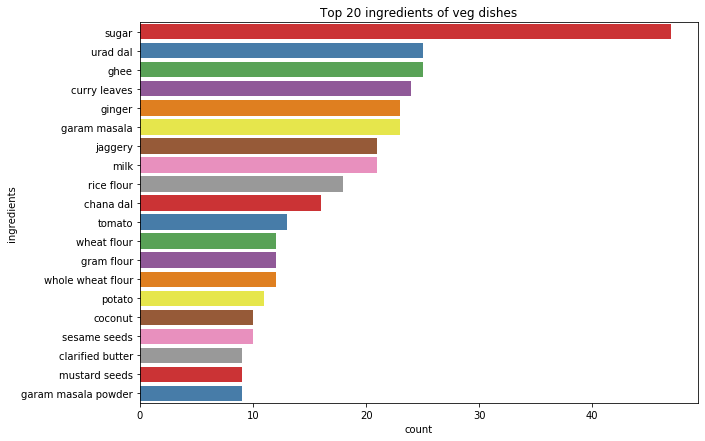

In [54]:
plt.figure(figsize=(10,7))
sns.barplot(data=final_veg_ingredients.head(20),x='count',y='ingredients',palette='Set1')
plt.title("Top 20 ingredients of veg dishes")
plt.show()

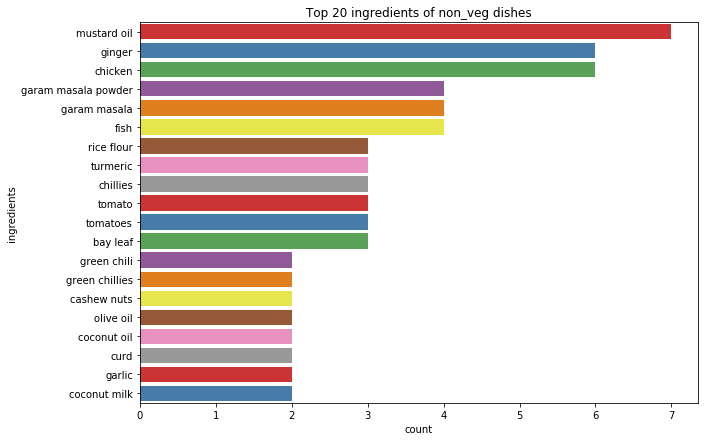

In [55]:
plt.figure(figsize=(10,7))
sns.barplot(data=final_non_veg_ingredients.head(20),x='count',y='ingredients',palette='Set1')
plt.title("Top 20 ingredients of non_veg dishes")
plt.show()

#### Insights: most of the ingredients are different in vegetarian and non-vegetarian dishes

### Feature Selection

#### In this section we dont consider cook_time and prep_time because as we have seen before that they contain some missing values

In [56]:
#let make a copy of original data
data=df.copy()
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


#### Feature selection of ingredients
- Here I have a so many ingredients which are used in indian cuisine
- I take only top 20 vegetarian ingredients and top 20 non-vegetarian ingredients as my features

In [57]:
# let's take top 20 veg and non-veg ingredients and merge it and make our final ingredient feature
top_veg_ingredients=final_veg_ingredients.head(20)
top_non_veg_ingredients=final_non_veg_ingredients.head(20)

#appending both of the above ingredients
final_ingredients=top_veg_ingredients.append(top_non_veg_ingredients)
final_ingredients.head()

,ingredients,count
0,sugar,47
1,urad dal,25
2,ghee,25
3,curry leaves,24
4,ginger,23


In [58]:
# here i took a ingredients separately from vegetarian and non vegetarian so that might be chance that it has some
# duplicate ingredients so let's check it

final_ingredients[final_ingredients.ingredients.duplicated(keep = False)]

,ingredients,count
4,ginger,23
5,garam masala,23
8,rice flour,18
10,tomato,13
19,garam masala powder,9
1,ginger,6
3,garam masala powder,4
4,garam masala,4
6,rice flour,3
9,tomato,3


In [59]:
# so here i can see that some of the ingredients are found as duplicated so let's merge it using group by

final_ingredients = final_ingredients.groupby("ingredients")["count"].sum().reset_index()

# let's sort it by count

final_ingredients = final_ingredients.sort_values("count", ascending = False).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,sugar,47
1,ginger,29
2,garam masala,27
3,ghee,25
4,urad dal,25


In [60]:
final_ingredients.ingredients.nunique()

35

In [61]:
#let do one hot encoding
for i in final_ingredients['ingredients']:
    data[i]=0 #creating a column for ith ingredient
    data.loc[data['ingredients'].str.contains(i),[i]]=1

In [62]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,tomatoes,bay leaf,coconut milk,olive oil,coconut oil,curd,green chillies,green chili,cashew nuts,garlic
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,0
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,1,...,0,0,0,0,0,0,0,0,0,0
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,0
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# encoding for diet
diet_encoding=pd.get_dummies(df['diet'],drop_first=True)
diet_encoding.head()

,vegetarian
0,1
1,1
2,1
3,1
4,1


In [64]:
# now let's concat it with our "data" data frame
data = pd.concat([data, diet_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,bay leaf,coconut milk,olive oil,coconut oil,curd,green chillies,green chili,cashew nuts,garlic,vegetarian
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1


In [65]:
#encoding for flavor_profile
flavor_profile_encoding = pd.get_dummies(df.flavor_profile, drop_first=True)
flavor_profile_encoding.head()

,other,sour,spicy,sweet
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [66]:
# now let's concat it with our main "data" data frame
data = pd.concat([data, flavor_profile_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,curd,green chillies,green chili,cashew nuts,garlic,vegetarian,other,sour,spicy,sweet
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,1,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,1,0,0,0,1


In [67]:
# encoding for course
course_encoding = pd.get_dummies(df.course, drop_first = True)
course_encoding.head()

,main course,snack,starter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [68]:
data = pd.concat([data, course_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,cashew nuts,garlic,vegetarian,other,sour,spicy,sweet,main course,snack,starter
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,1,0,0,0,1,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,1,0,0,0,1,0,0,0


In [69]:
#encoding for state
state_encoding = pd.get_dummies(df.state, drop_first = True)
state_encoding.head()

,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,Kerala,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
data = pd.concat([data, state_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,1,0,0,0,0,0,0


In [71]:
#encoding for region
region_encoding = pd.get_dummies(df.region, drop_first = True)
region_encoding.head()

,Central,East,North,North East,South,West
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,1,0,0,0,0


In [72]:
data = pd.concat([data, region_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,1,0,1,0,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1


In [73]:
#dropping unnecessary columns from the data
final_data = data.drop(['ingredients', 'diet', 'prep_time', 'cook_time','flavor_profile', 'course', 'state', 'region'],axis=1)
final_data.head()

,name,sugar,ginger,garam masala,ghee,urad dal,curry leaves,rice flour,milk,jaggery,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,balu shahi,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,boondi,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,gajar ka halwa,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,ghevar,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,gulab jamun,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [74]:
#since using nearest neighbors using cosine similarity so let take column as a index
final_data.set_index("name", inplace = True)
final_data.head()

,sugar,ginger,garam masala,ghee,urad dal,curry leaves,rice flour,milk,jaggery,chana dal,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
name,,,,,,,,,,,,,,,,,,,,,
balu shahi,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
boondi,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
gajar ka halwa,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
ghevar,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
gulab jamun,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


### Building a model

In [75]:
# here i'm going to use cosine similarity for recommendation of cuisine
# cosine similarity is nothing but a degree between two data points or two similar type of data

from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(metric='cosine',algorithm='brute')
model.fit(final_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [76]:
# let randomly select a dish
picked_cuisine = final_data.index[np.random.choice(final_data.shape[0])]
picked_cuisine

'chole bhature'

In [77]:
# now let's find similarity or recommened cuisine using our model
# our model return distance and index
# distance is indicates that how far that similarity of that recommended cuisine with our picked cuisine
# index indicates a index of our final data which is a name of cuisine

# here i want 10 recommended cuisine for my picked cuisine

distance, cuisine_index = model.kneighbors(final_data[final_data.index == picked_cuisine], n_neighbors = 11)

In [78]:
distance

array([[3.33066907e-16, 7.41799002e-02, 1.42857143e-01, 1.42857143e-01,
        1.42857143e-01, 1.42857143e-01, 1.42857143e-01, 1.42857143e-01,
        1.42857143e-01, 1.54845745e-01, 1.54845745e-01]])

In [79]:
cuisine_index

array([[ 82, 106, 107, 102, 100,  91, 121,  86,  72,  73, 108]])

In [80]:
distance = distance.flatten()
cuisine_index = cuisine_index.flatten()
print("Recommendation for ", picked_cuisine, " are following")

count = 1
for i in range(cuisine_index.size):
    if final_data.index[cuisine_index[i]] == picked_cuisine:
        continue
    print(count, ". ", final_data.index[cuisine_index[i]], " with distance ", distance[i])
    count += 1

Recommendation for  chole bhature  are following
1 .  palak paneer  with distance  0.07417990022744847
2 .  paneer butter masala  with distance  0.14285714285714313
3 .  mushroom do pyaza  with distance  0.14285714285714313
4 .  makki di roti sarson da saag  with distance  0.14285714285714313
5 .  kadai paneer  with distance  0.14285714285714313
6 .  vegetable jalfrezi  with distance  0.14285714285714313
7 .  dal tadka  with distance  0.14285714285714313
8 .  aloo shimla mirch  with distance  0.14285714285714313
9 .  bhatura  with distance  0.15484574527148354
10 .  paneer tikka masala  with distance  0.15484574527148354


In [81]:
# let's export our final_data, it will used on frontend for getting recommendation
final_data.to_csv("model_data.csv")

# let's export our main data for showing data on web app
df.to_csv("cleaned_data.csv", index = False)


In [87]:
# let's export model using pickle file
import pickle
with open("model.pickle", "wb") as f:
    pickle.dump(model, f)